In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [71]:
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df.shape

(200, 5)

In [73]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [74]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [75]:
# gives the sum of any null values in the dataset's attributes
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [76]:
df.drop(["CustomerID"], axis=1, inplace=True)

C:\Users\prath\AppData\Local\Temp\ipykernel_19560\3225995158.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\prath\AppData\Local\Temp\ipykernel_19560\3225995158.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\prath\AppData\Local\Temp\

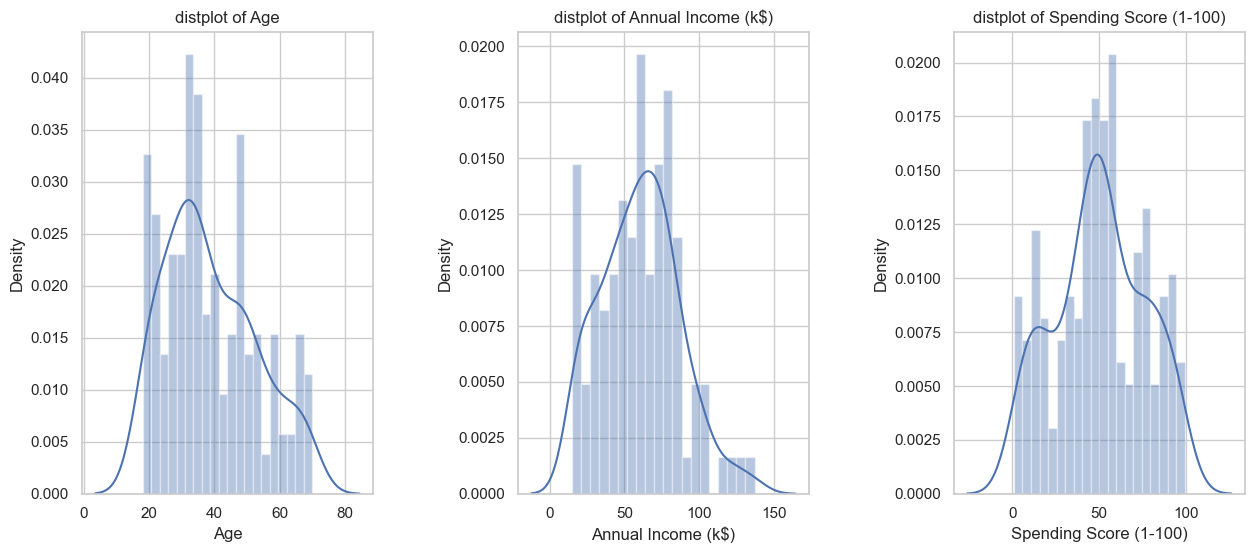

In [77]:
plt.figure(1, figsize=(15, 6))
n=0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace= 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title("distplot of {}" .format(x))
plt.show()

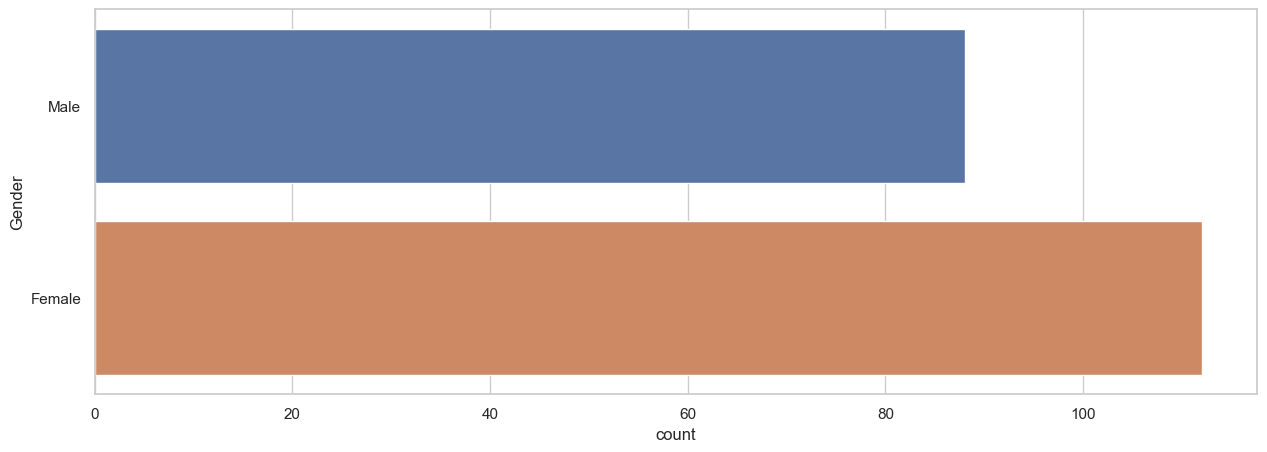

In [78]:
plt.figure(figsize=(15, 5))
sns.countplot(y = 'Gender', data = df, hue = "Gender")
plt.show()

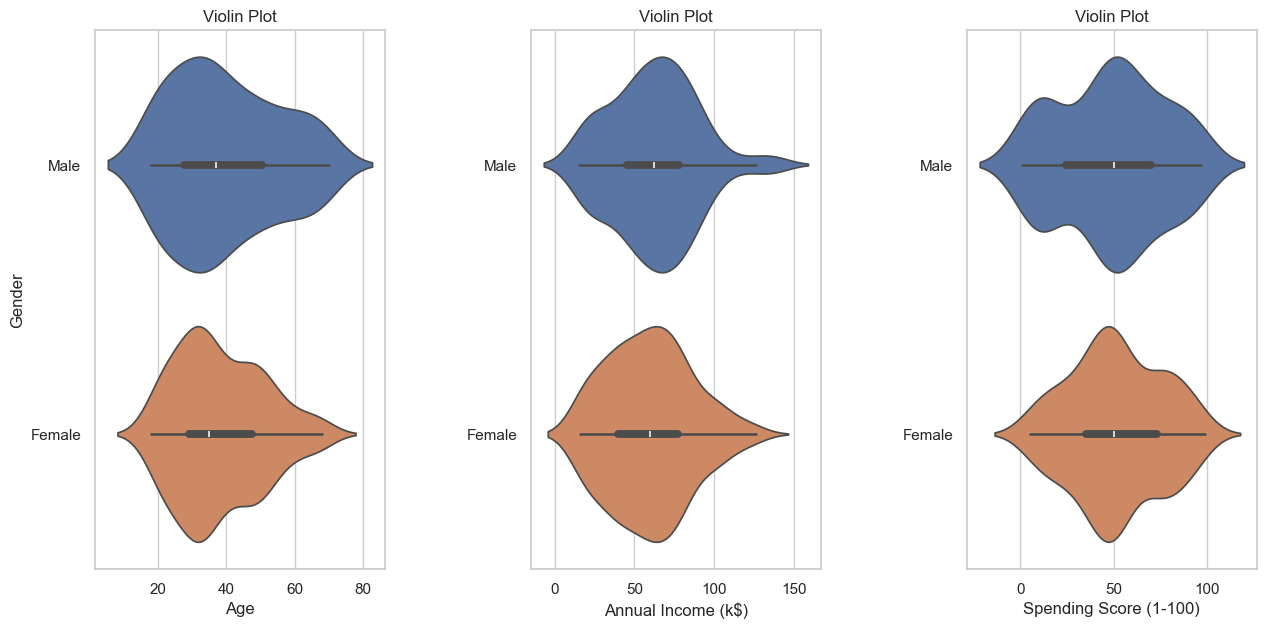

In [79]:
plt.figure(1, figsize=(15 ,7))
n = 0

for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1 
    plt.subplot(1, 3, n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = "Gender", data = df, hue="Gender")
    plt.ylabel("Gender" if n == 1 else " ")
    plt.title("Violin Plot")
plt.show()


C:\Users\prath\AppData\Local\Temp\ipykernel_19560\1516006144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


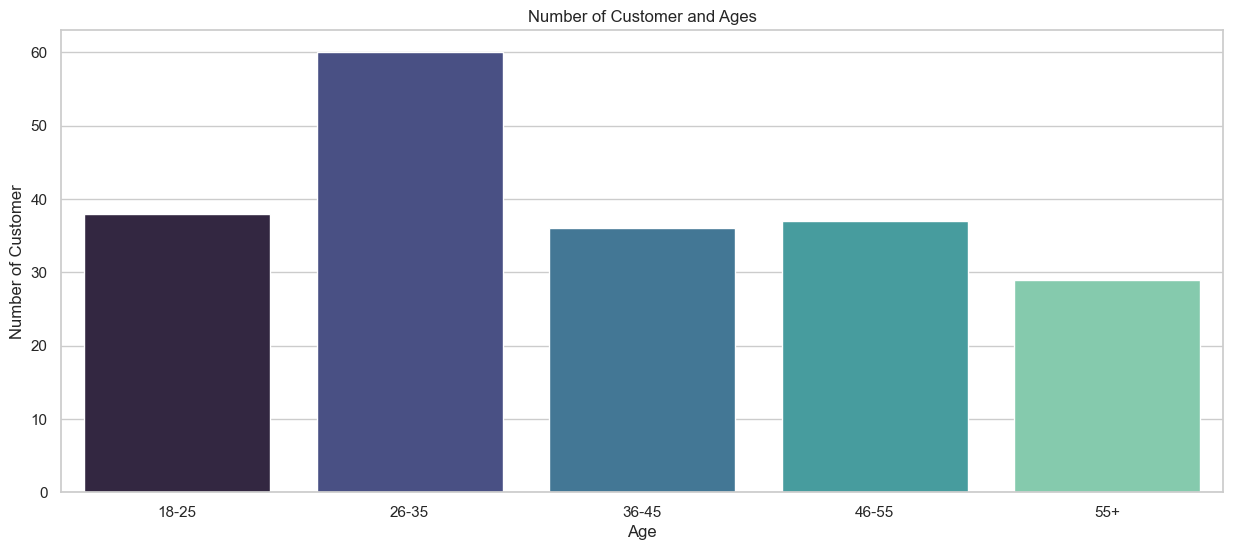

In [80]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45","46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

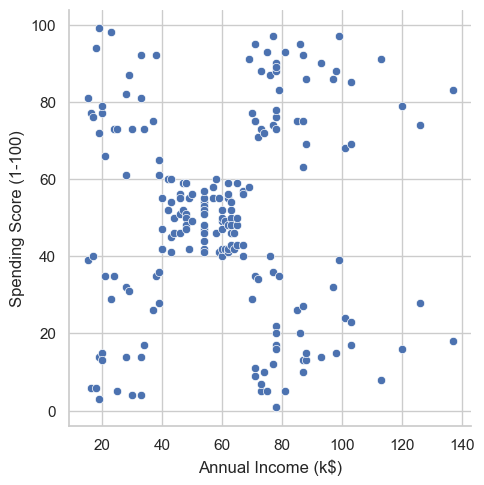

In [81]:
sns.relplot(x= "Annual Income (k$)", y = "Spending Score (1-100)", data = df)

C:\Users\prath\AppData\Local\Temp\ipykernel_19560\4093672993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ssx, y = ssy, palette = "rocket")


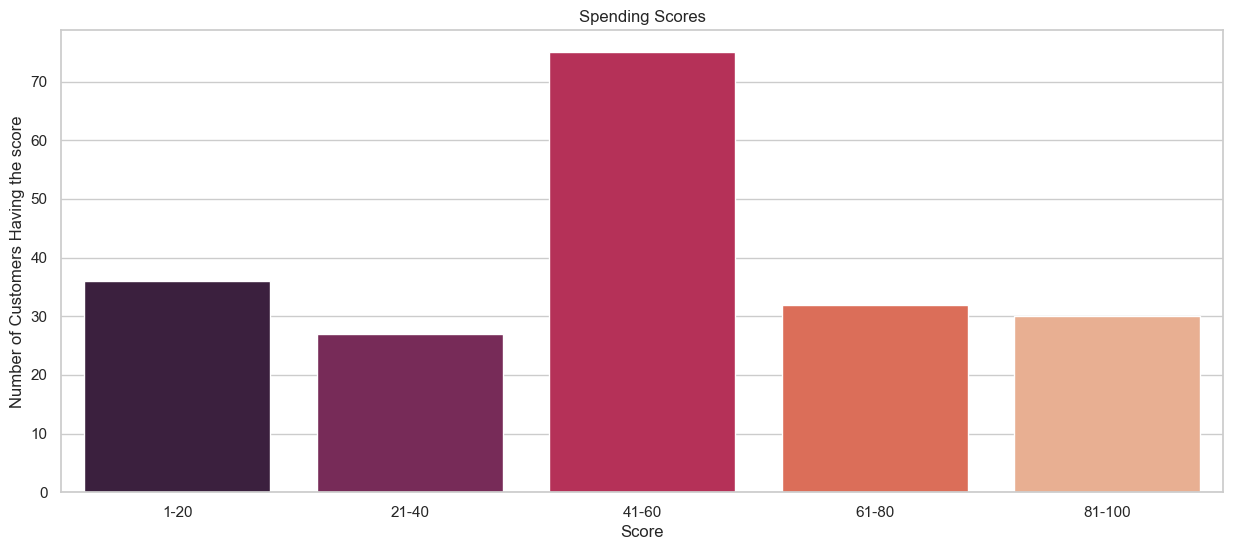

In [82]:
ss_1_20 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"] [(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]
plt.figure(figsize = (15, 6))
sns.barplot(x = ssx, y = ssy, palette = "rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers Having the score")
plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_19560\3499092768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


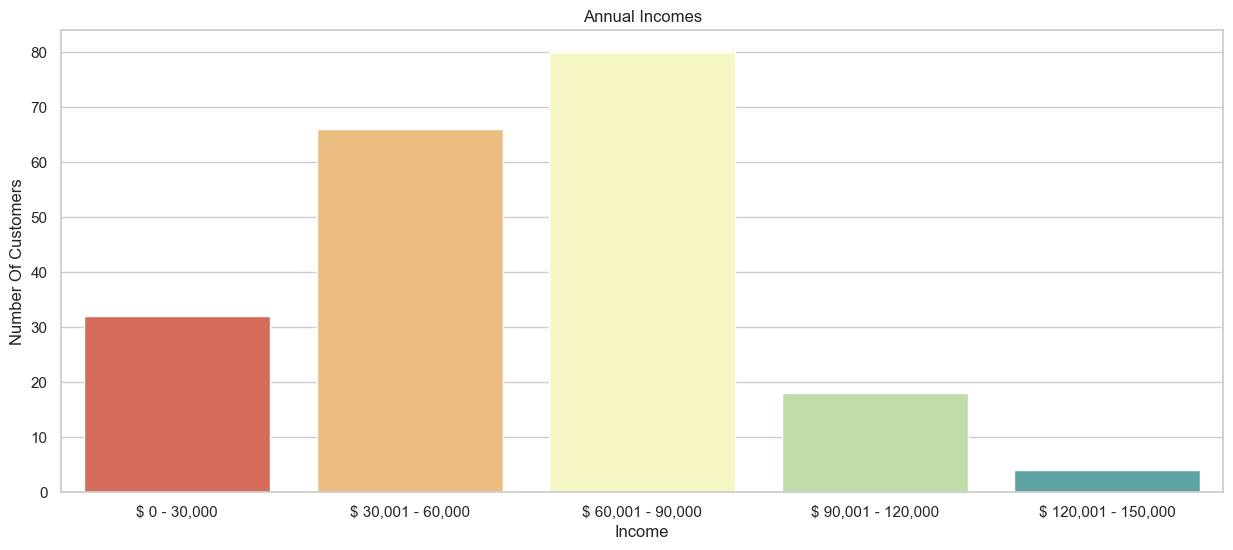

In [83]:
ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number Of Customers")
plt.show()

C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

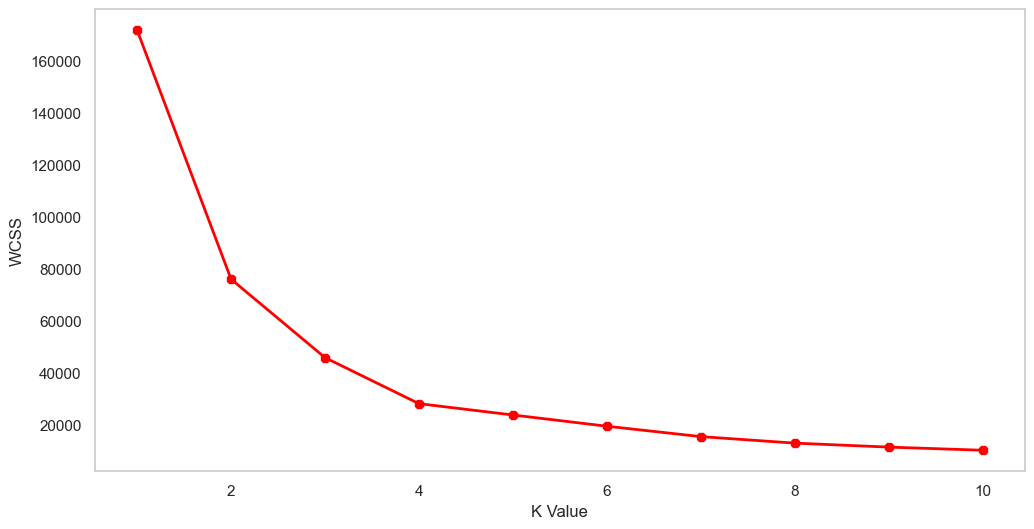

In [84]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [85]:
kmeans = KMeans(n_clusters = 4)

label = kmeans.fit_predict(X1)

print(label)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [86]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


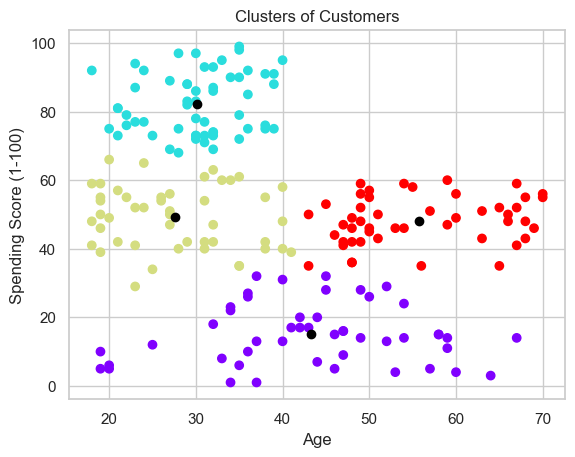

In [87]:
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

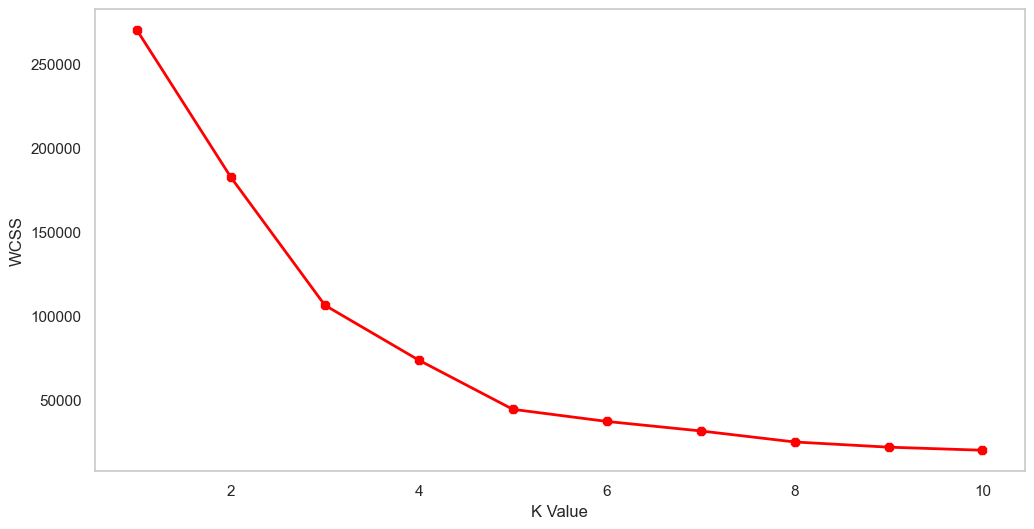

In [88]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [89]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


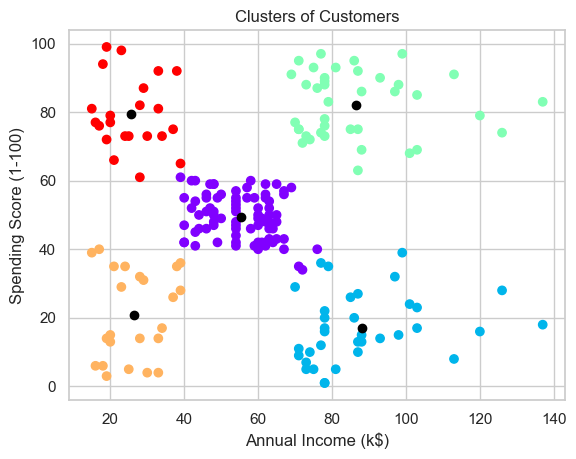

In [91]:
plt.scatter(X2[:, 0], X1[:, 1], c=kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

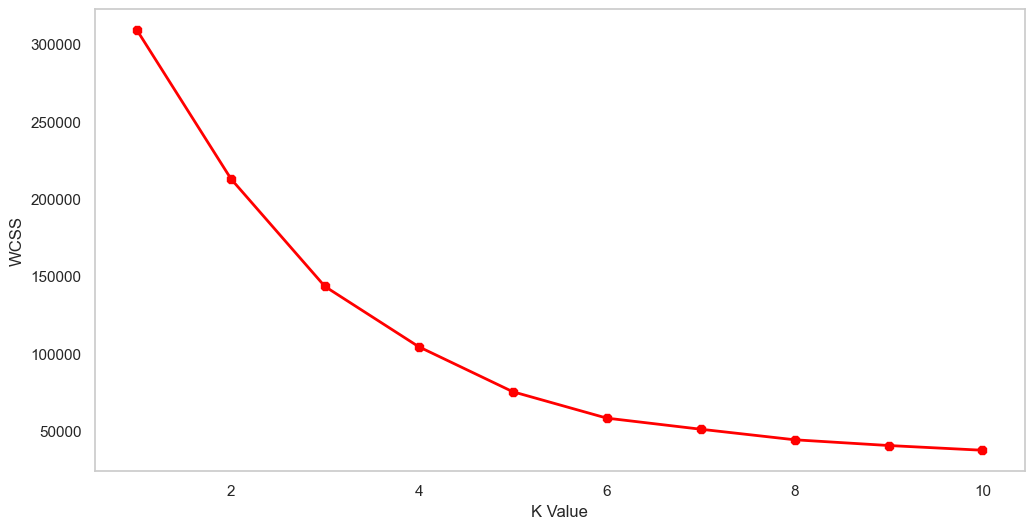

In [92]:
X3 = df.iloc[:, 1:]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [93]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.12658228 54.82278481 49.83544304]
 [25.27272727 25.72727273 79.36363636]
 [40.32432432 87.43243243 18.18918919]]


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


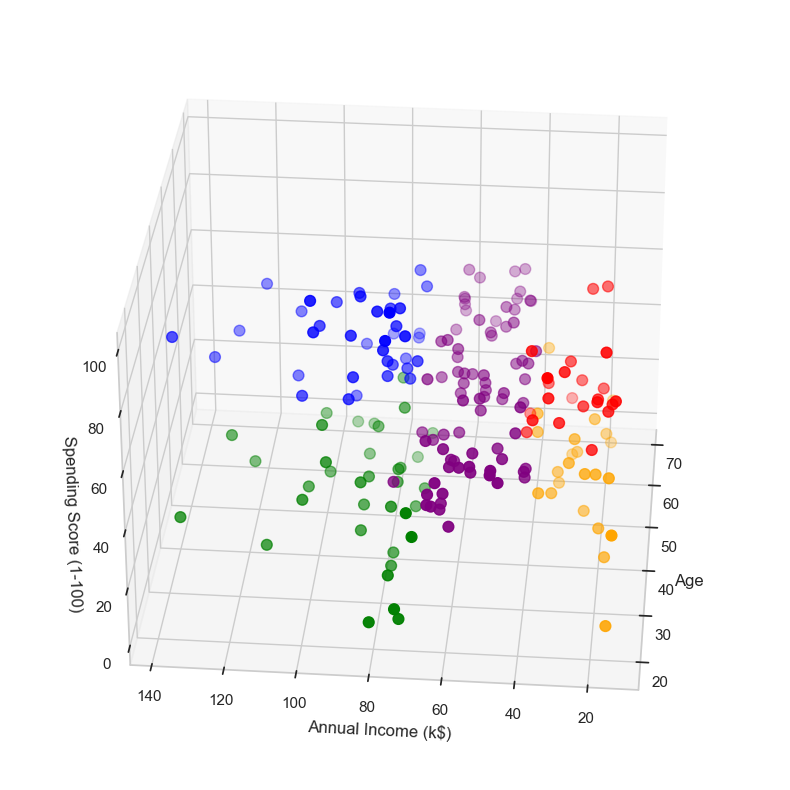

In [95]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c="blue", s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c="red", s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c="green", s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c="orange", s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c="purple", s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()